Adaugarea librariilor:

In [ ]:
!pip install pandas_datareader==0.10.0

In [ ]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Colectarea datelor:

In [ ]:
df = web.DataReader('BTC-USD', data_source='yahoo', start='2017-05-02', end='2022-05-02')

Afisarea datelor:

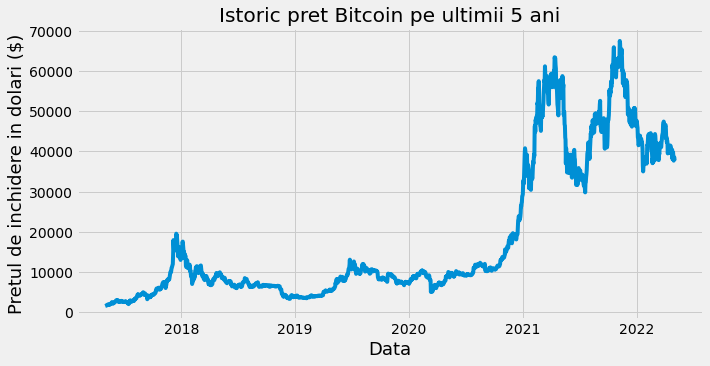

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Istoric pret Bitcoin pe ultimii 5 ani')
plt.plot(df['Adj Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Pretul de inchidere in dolari ($)', fontsize=18)
plt.show()

Prelucrarea datelor:

In [ ]:
lungime_date_antrenare = len(df)-30

In [ ]:
training_data = df['Adj Close'][:lungime_date_antrenare]

In [ ]:
testing_data = df['Adj Close'][lungime_date_antrenare-1:]

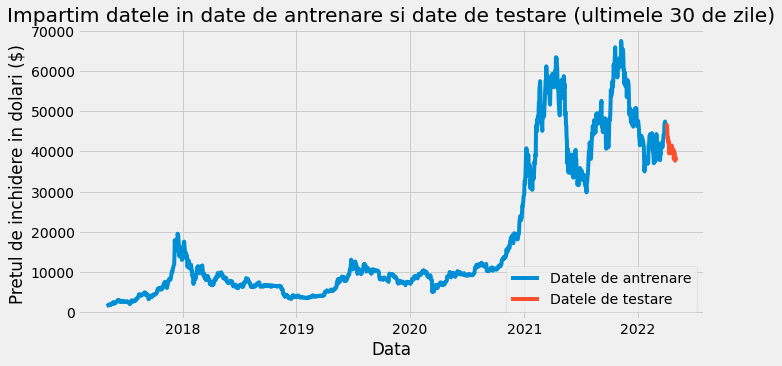

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Impartim datele in date de antrenare si date de testare (ultimele 30 de zile)')
plt.xlabel('Data')
plt.ylabel('Pretul de inchidere in dolari ($)')
plt.plot(training_data)
plt.plot(testing_data)
plt.legend(['Datele de antrenare', 'Datele de testare'], loc='lower right')

In [ ]:
numar_predictii = len(testing_data)

Crearea modelului ARIMA si a predictiilor

In [ ]:
model = ARIMA(training_data, order=(6, 1, 3))

model = model.fit()

predictii, se, conf = model.forecast(numar_predictii)

predictii = pd.Series(predictii, index=testing_data[:numar_predictii].index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Afisarea predictiilor:

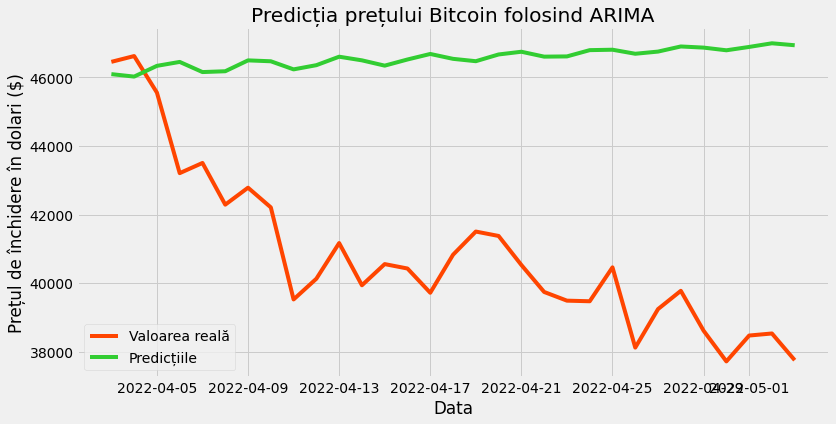

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Predicția prețului Bitcoin folosind ARIMA')
plt.xlabel('Data')
plt.ylabel('Prețul de închidere în dolari ($)')
plt.plot(testing_data, color='orangered')
plt.plot(predictii, color='limegreen')
plt.legend(['Valoarea reală', 'Predicțiile'], loc='lower left')

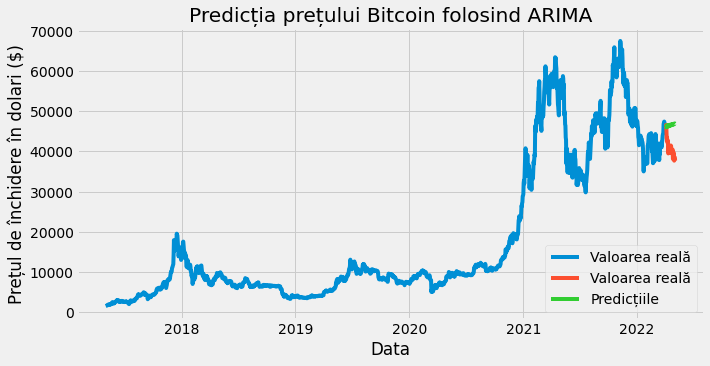

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Predicția prețului Bitcoin folosind ARIMA')
plt.xlabel('Data')
plt.ylabel('Prețul de închidere în dolari ($)')
plt.plot(training_data)
plt.plot(testing_data)
plt.plot(predictii, color='limegreen')
plt.legend(['Valoarea reală', 'Valoarea reală', 'Predicțiile'], loc='lower right')

Calculare MAPE:

In [ ]:
mape = np.mean(np.abs(predictii - testing_data)/np.abs(testing_data))
print('Eroare procentuala media absoluta (MAPE) =', mape) 

Eroare procentuala media absoluta (MAPE) = 0.14558263458258563
